In [1]:
import numpy as np
from enmspring.graphs import GraphAgent, EigenvaluePlot
import matplotlib.pyplot as plt
rootfolder = '/home/yizaochen/codes/dna_rna/fluctmatch_sequence'
rtol=1e-05
atol=1e-08

### Part 1: Initialize

In [82]:
host = 'tgtg_21mer'
g_agent = GraphAgent(host, rootfolder)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/tgtg_21mer/bdna+bdna/pd_dfs exists


In [83]:
g_agent.df_st.head()

,PairID,PairType,Big_Category,Strand_i,Resid_i,Atomname_i,Atomid_i,Strand_j,Resid_j,Atomname_j,Atomid_j,k,b0
99,100,STACK-1,stack,STRAND1,1,N1,6,STRAND1,2,N7,28,0.0164,4.3530
114,115,STACK-1,stack,STRAND1,1,C6,7,STRAND1,2,N7,28,0.0124,4.3330
115,116,STACK-1,stack,STRAND1,1,C6,7,STRAND1,2,C5,29,0.0148,4.6244
126,127,STACK-1,stack,STRAND1,1,C5,8,STRAND1,2,N7,28,0.0040,4.6771
127,128,STACK-1,stack,STRAND1,1,C5,8,STRAND1,2,C5,29,0.0324,4.6790


### Part 2: Build Node List

In [84]:
g_agent.build_node_list_base()
print(f"Thare are {g_agent.n_node} nodes.")

Thare are 399 nodes.


### Part 3: Build Adjacency Matrix

In [85]:
g_agent.build_adjacency_from_df_st()

In [86]:
# Check Matrix Symmetrix
np.allclose(g_agent.adjacency_mat, g_agent.adjacency_mat.T, rtol=rtol, atol=atol)

True

### Part 4: Build Degree Matrix

In [87]:
g_agent.build_degree_from_adjacency()

In [88]:
# Check diagonal matrix
np.allclose(g_agent.degree_mat, np.diag(np.diag(g_agent.degree_mat))) # check if diagonal

True

### Part 5: Build Laplacian Matrix

In [89]:
g_agent.build_laplacian_by_adjacency_degree()

Finish the setup for Laplaican matrix.


In [90]:
# Check Matrix Symmetrix
np.allclose(g_agent.laplacian_mat, g_agent.laplacian_mat.T, rtol=rtol, atol=atol)

True

### Part 6: Do Eigen-decomposition
Reference: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [91]:
w, v = np.linalg.eig(g_agent.laplacian_mat)

In [92]:
# Sort
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]

### Part 7: Eigenvalue Plot

In [2]:
e_agent = EigenvaluePlot(rootfolder)

In [3]:
e_agent.initailize_six_systems()

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
Finish the setup for Laplaican matrix.
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/gcgc_21mer/bdna+bdna/pd_dfs exists
Finish the setup for Laplaican matrix.
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/tgtg_21mer/bdna+bdna/pd_dfs exists
Finish the setup for Laplaican matrix.
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/atat_21mer/bdna+bdna/pd_dfs exists
Finish the setup for Laplaican matrix.
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/ctct_21mer/bdna+bdna/pd_dfs exists
Finish the setup for Laplaican matrix.
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/g_tract_21mer/bdna+bdna/pd_dfs exists
Finish the setup for Laplaican matrix.


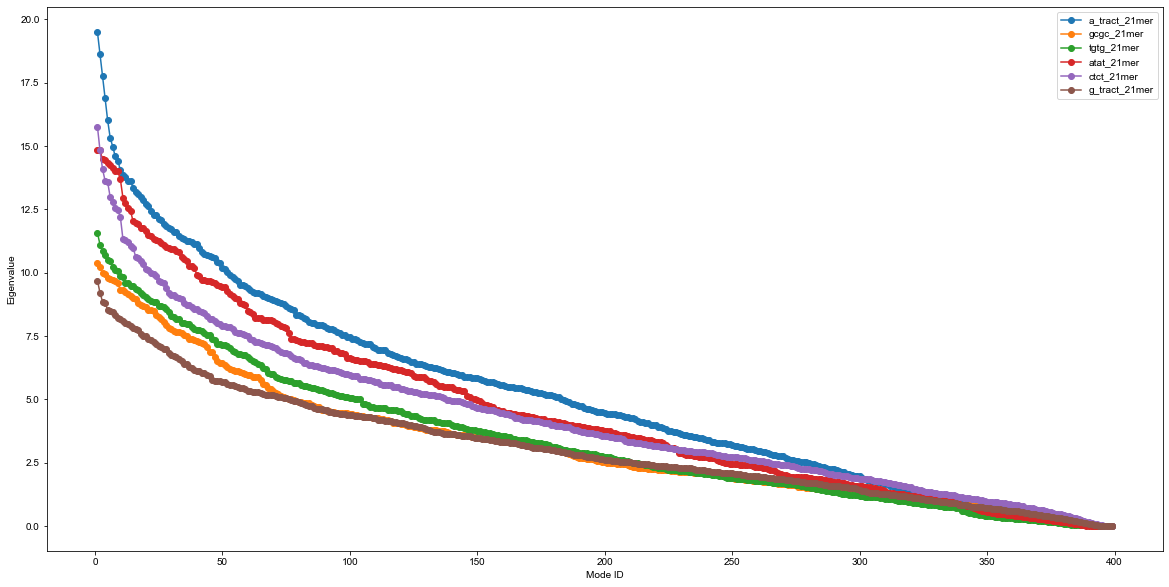

In [7]:
figsize = (20, 10)
e_agent.plot_main(figsize)
#plt.savefig('Rigidity_graph_eigenvalue_basestack.png', dpi=200)
plt.show()

### Part 8: Observe

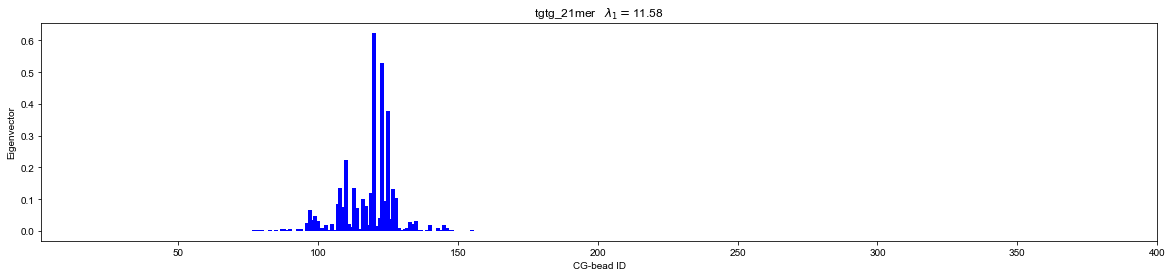

In [93]:
sele_id = 1
w_sele = w[sele_id-1]
v_sele = v[:, sele_id-1]
x = range(1, g_agent.n_node+1)

fig, ax = plt.subplots(figsize=(20, 4))
title = f'{host}   $\lambda_{sele_id}=$' + f'{w_sele:.2f}'
ax.set_title(title)
ax.vlines(x, 0, v_sele, colors='b', lw=4)
ax.set_xlabel("CG-bead ID")
ax.set_ylabel("Eigenvector")
ax.set_xlim(1, g_agent.n_node+1)

plt.show()

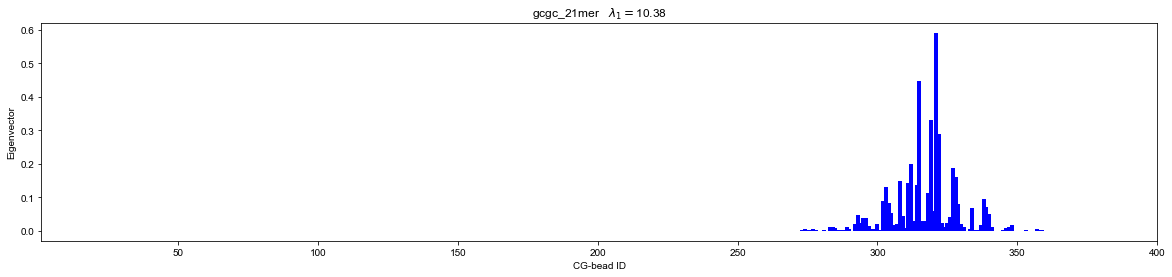

In [81]:
sele_id = 1
w_sele = w[sele_id-1]
v_sele = v[:, sele_id-1]
x = range(1, g_agent.n_node+1)

fig, ax = plt.subplots(figsize=(20, 4))
title = f'{host}   $\lambda_{sele_id}=$' + f'{w_sele:.2f}'
ax.set_title(title)
ax.vlines(x, 0, v_sele, colors='b', lw=4)
ax.set_xlabel("CG-bead ID")
ax.set_ylabel("Eigenvector")
ax.set_xlim(1, g_agent.n_node+1)

plt.show()

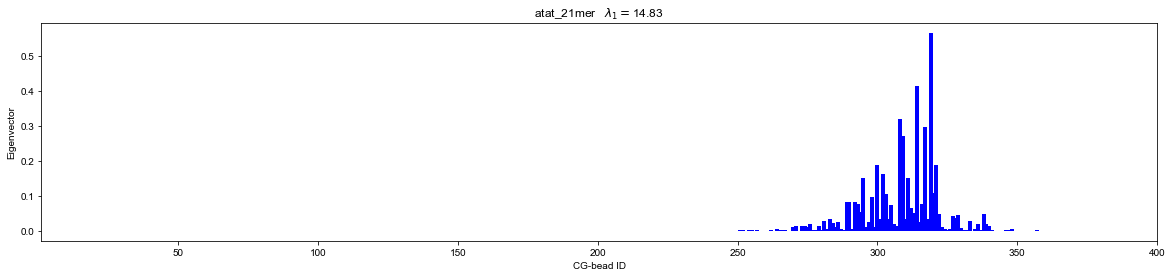

In [69]:
sele_id = 1
w_sele = w[sele_id-1]
v_sele = v[:, sele_id-1]
x = range(1, g_agent.n_node+1)

fig, ax = plt.subplots(figsize=(20, 4))
title = f'{host}   $\lambda_{sele_id}=$' + f'{w_sele:.2f}'
ax.set_title(title)
ax.vlines(x, 0, v_sele, colors='b', lw=4)
ax.set_xlabel("CG-bead ID")
ax.set_ylabel("Eigenvector")
ax.set_xlim(1, g_agent.n_node+1)

plt.show()

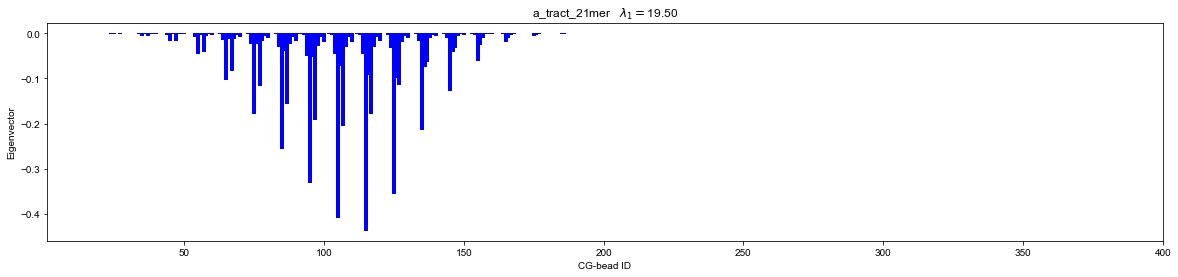

In [57]:
sele_id = 1
w_sele = w[sele_id-1]
v_sele = v[:, sele_id-1]
x = range(1, g_agent.n_node+1)

fig, ax = plt.subplots(figsize=(20, 4))
title = f'{host}   $\lambda_{sele_id}=$' + f'{w_sele:.2f}'
ax.set_title(title)
ax.vlines(x, 0, v_sele, colors='b', lw=4)
ax.set_xlabel("CG-bead ID")
ax.set_ylabel("Eigenvector")
ax.set_xlim(1, g_agent.n_node+1)

plt.show()

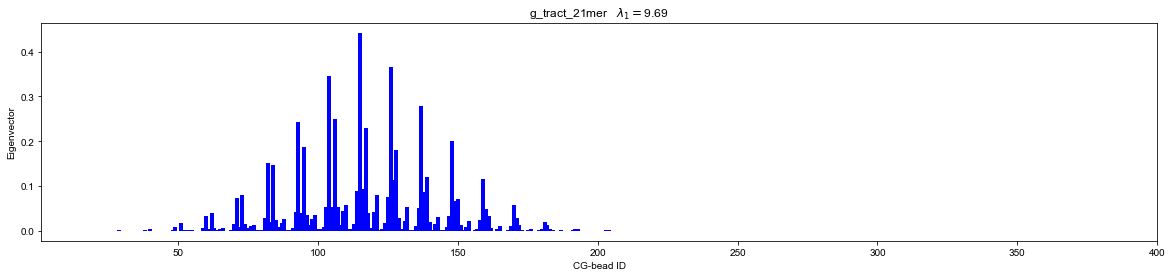

In [46]:
sele_id = 1
w_sele = w[sele_id-1]
v_sele = v[:, sele_id-1]
x = range(1, g_agent.n_node+1)

fig, ax = plt.subplots(figsize=(20, 4))
title = f'{host}   $\lambda_{sele_id}=$' + f'{w_sele:.2f}'
ax.set_title(title)
ax.vlines(x, 0, v_sele, colors='b', lw=4)
ax.set_xlabel("CG-bead ID")
ax.set_ylabel("Eigenvector")
ax.set_xlim(1, g_agent.n_node+1)

plt.show()

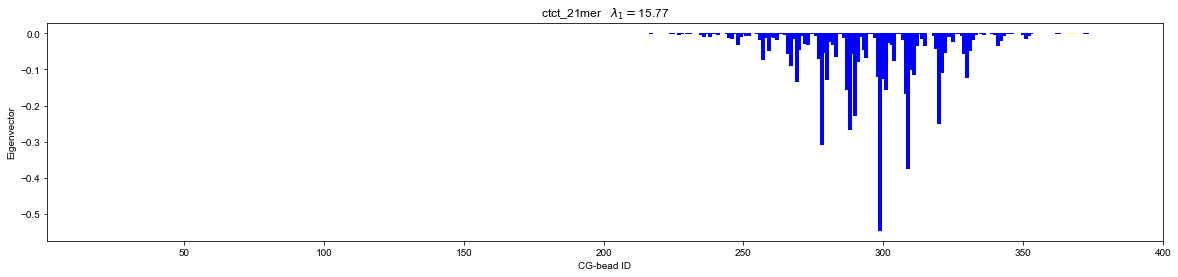

In [34]:
sele_id = 1
w_sele = w[sele_id-1]
v_sele = v[:, sele_id-1]
x = range(1, g_agent.n_node+1)

fig, ax = plt.subplots(figsize=(20, 4))
title = f'{host}   $\lambda_{sele_id}=$' + f'{w_sele:.2f}'
ax.set_title(title)
ax.vlines(x, 0, v_sele, colors='b', lw=4)
ax.set_xlabel("CG-bead ID")
ax.set_ylabel("Eigenvector")
ax.set_xlim(1, g_agent.n_node+1)

plt.show()

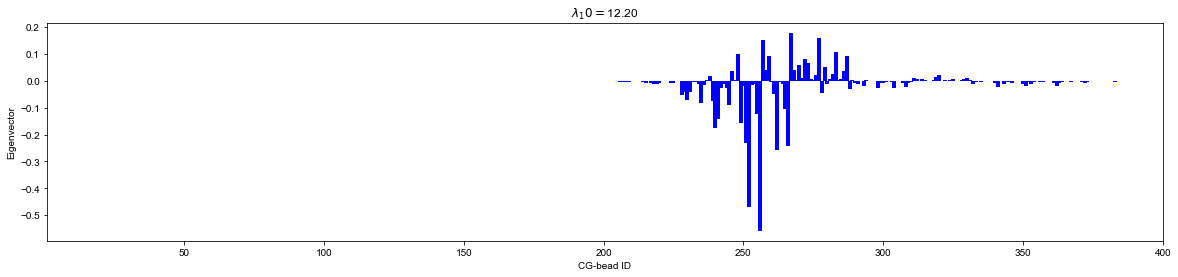

In [32]:
sele_id = 10
w_sele = w[sele_id-1]
v_sele = v[:, sele_id-1]
x = range(1, g_agent.n_node+1)

fig, ax = plt.subplots(figsize=(20, 4))
title = f'$\lambda_{sele_id}=$' + f'{w_sele:.2f}'
ax.set_title(title)
ax.vlines(x, 0, v_sele, colors='b', lw=4)
ax.set_xlabel("CG-bead ID")
ax.set_ylabel("Eigenvector")
ax.set_xlim(1, g_agent.n_node+1)

plt.show()